# Types by Country

In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import json
import ast
%matplotlib inline

In [2]:
#Read CSV file
df = pd.read_csv('searchData.csv')

In [3]:
#Split info column into 7 columns based on categories
mylist = list(df['info'])
mynewlist = []

#For every item in mylist,append the item to the mynewlist
for l in mylist:
    mynewlist.append(ast.literal_eval(l))

#Create dataframe for mynewlist so that it can be concatinated with other dataframe
df_info = pd.DataFrame(mynewlist)

#Add columns of decoded info to the initial dataset
df1 = pd.concat([df,df_info],axis=1)

#Remove the column info
del df1['info']

In [4]:
#Filter only "/location/" in URL column    
dframe = df1[df1['url'].str.contains('location')]

#Replace null values in userOwns(user_id) with Traveler;;;;
dframe.loc[:,["userOwns(user_id)"]] = dframe['userOwns(user_id)'].fillna('Traveler;;;;')
#Clean up userOwns(user_id) column        
        #Drop data which contains Businesss in userOwns(user_id) column
dframe = dframe[dframe['userOwns(user_id)'].str.contains("Business") == False]
        #Drop data which contains str"Internal" in userOwns(user_id) column
dframe = dframe[dframe['userOwns(user_id)'].str.contains("Internal") == False]     
        #Drop data which contains str"Partner" in userOwns(user_id) column
dframe = dframe[dframe['userOwns(user_id)'].str.contains("Partner") == False]   
        #Drop data which contains str"Travel Agency" in userOwns(user_id) column
dframe = dframe[dframe['userOwns(user_id)'].str.contains("Travel Agency") == False]

#Add Country column
        #Adding a new country column
dframe1 = dframe['url'].str.extract(r'(belize|costa-rica|honduras|panama|guatemala|el-salvador|nicaragua|peru|turks-and-caicos|laos|botswana|south-africa|namibia|cuba|chile|morocco|canada|united-kingdom|jamaica|uganda|croatia|tanzania|czech-republic|israel|kenya|thailand|greece|bulgaria|united-states-of-america|rwanda|uzbekistan|egypt|nepal|vietnam|ethiopia|mexico|romania|bolivia|saint-martin|brazil|argentina|bahamas|trinidad-&-tobago|saint-lucia|united-arab-emirates|india|austria|armenia|dominican-republic|australia|turkey|east-timor|cayman-islands|puerto-rico|ecuador|ireland|bangladesh|italy|us-virgin-islands|aruba)',expand=False)
dframe1 = pd.concat([dframe,dframe1],axis=1)
dframe1.columns.values[14] = 'Country'

#Add City column
dframe2 = dframe['url'].str.extract(r'(belize-district-incl-the-cayes|cayo|corozal|orange-walk|stann-creek|toledo|alajuela|cartago|guanacaste|heredia|limon|puntarenas|san-jose|atlntida|roatan|choluteca|colon|comayagua|copan|cortes|el-para­so|francisco-morazan|gracias-a-dios|intibuc|la-paz|lempira|ocotepeque|olancho|santa-brbara|valle|yoro|guatemala-department|quetzaltenango|escuintla|chimaltenango|huehuetenango|izabal|alta-verapaz|el-quiche|totonicapn|suchitepquez|jalapa|chiquimula|retalhuleu|sacatepquez|san-marcos|solola|zacapa|jutiapa|peten|santa-rosa|baja-verapaz|el-progreso|ahuachapan|cabaas|chalatenango|cuscatlan|la-libertad|la-unin|morazn|san-miguel|san-salvador|san-vicente|santa-ana|sonsonate|usulutn|leon|chontales|rivas|region-autonoma-del-atlantico-sur|boaco|region-autnoma-del-atlantico-norte|masaya|chinandega|nueva-segovia|matagalpa|managua|estel|granada|carazo|ro-san-juan|jinotega|madriz|kuna-yala|los-santos|cocle|chiriqui|panama-province|bocas-del-toro|ucayali|ngobe-bugle|herrera|veraguas|darin|ember|south-caicos|north-caicos|middle-caicos|ambergris-cays|grand-turk|salt-cay|providenciales|houaphan|central-district|north-east-district|north-west-district|kgatleng-district|kweneng-district|southern-district|south-east-district|kgalagadi-district|ghanzi-district|northern-cape|khomas|erongo|zambezi|hardap|oshana|otjozondjupa|kavango-east|kunene|ohangwena|omaheke|omusati|oshikoto|karas-region|tumbes|piura|lambayeque|amazonas|san-martin|loreto|cajamarca|la-libertad |ancash|huanuco|pasco|callao|junin|huancavelica|ayacucho|ica|apurimac|cusco|madre-de-dios|puno|arequipa|moquegua|tacna|vientiane|champasak|savannakhet|luang-prabang|xiangkhouang|khammouane|oudomxai|bolikhamxai|attapu|bokeo|luang-namtha|phongsali|xaignabouli|salavan|xekong|havana|santiago-de-cuba|camaguey|holguin|guantanamo|villa-clara|las-tunas|granma|cienfuegos|pinar-del-rio|matanzas|ciego-de-avila|sancti-spiritus|isla-de-la-juventud|artemisa|mayabeque|gauteng|western-cape|utila|arica-and-parinacota-region|tarapac-region|antofagasta-region|atacama-region|coquimbo-region|valparaiso-region|marrakech-safi|tanger-tetouan-al-hoceima|rabat-sale-kenitra|meknes-tafilalet|souss-massa|casablanca-settat|oriental|doukkala-abda|taza-al-hoceima-taounate|laayoune-sakia-el-hamra|guelmim-oued-noun|draa-tafilalet|tadla-azilal|dakhla-oued-ed-dahab|british-columbia|alberta|manitoba|new-brunswick|newfoundland-and-labrador|nova-scotia|ontario|prince-edward-island|quebec|saskatchewan|northwest-territories|nunavut|yukon|south-west|west-midlands|yorkshire-and-the-humber|north-west|greater-london|hanover|saint-james|trelawny|westmoreland|clarendon|manchester|saint-ann|saint-catherine|saint-mary|kingston-parish|portland|saint-andrew|saint-thomas|central|city-of-zagreb|split-dalmatia|primorje-gorski-kotar|osijek-baranja|brod-posavina|istria|karlovac|sisak-moslavina|varazdin|sibenik-knin|dubrovnik-neretva|bjelovar-bilogora|zagreb-county|vukovar-srijem|medimurje|pozega-slavonia|dar-es-salaam|mwanza|arusha|dodoma|mbeya|morogoro|tanga|shinyanga|tabora|zadar|prague|south-bohemia|plzen|karlovy-vary|usti-nad-labem|liberec|hradec-kralove|pardubice|olomouc|moravia-silesia|south-moravia|zl­n|vysocina|jerusalem-district|northern-district|haifa-district|tel-aviv-district|judea-and-samaria-area|nairobi-county|mombasa-county|kisumu-county|nakuru-county|uasin-gishu-county|kilifi-county|taita-taveta-county|bangkok|nakhon-ratchasima|chiang-mai|songkhla|udon-thani|nonthaburi|khon-kaen|ubon-ratchathani|nakhon-si-thammarat|phuket|chonburi|attica|sofia-city-province|plovdiv|varna|burgas|ruse|stara-zagora|pleven|sliven|dobrich|shumen|florida|kigali|tashkent|samarkand-region|kashkadarya|bukhara|xorazm|fergana|surkhandarya|giza|agadir-ida-ou-tanane|kaski|kabarole-district|kathmandu|lima|tha-thin-hu|xieng-khuang|central-bohemia|southern-nations-nationalities-and-peoples-region|tigray|chiapas|biobio-region|los-lagos-region|amhara|guna-yala|myagdi-district|gandaki-zone|zanzibar|hawaii|bihor|potosi|point-blanche|rio-de-janeiro|ciudad-de-buenos-aires-distrito-federal|santiago-metropolitan-region|magallanes-and-antartica-chilena-region|new-york|alaska|grand-bahama|tobago|colorado|gros-islet|baja-california-sur|dubai|abu-dhabi|ajman|fujairah|ras-al-khaimah|sharjah|umm-al-quwain|uttar-pradesh|rajasthan|riviera-maya|vienna|guerrero|quintana-roo|baja-california|colima|sinaloa|yucatn|jalisco|armavir-province|shirak|azua|baoruco|barahona|dajabon|distrito-nacional|duarte|elias-pina|el-seibo|espaillat|hato-mayor|hermanas-mirabal|independencia|la-altagracia|la-romana|la-vega|mar­a-trinidad-snchez|monsenor-nouel|monte-cristi|monte-plata|pedernales|peravia|puerto-plata|samana|sanchez-ram­rez|san-cristobal|san-jose-de-ocoa|san-juan|san-pedro-de-macoris|santiago|santiago-rodr­guez|santo-domingo|valverde|new-south-wales|istanbul|ankara|bursa|adana|gaziantep|konya|antalya|kayseri|mersin|kerala|guanaja|ararat|vayots-dzor|kotayk|syunik|gegharkunik|dili|district-of-columbia|jharkhand|delhi|himachal-pradesh|karnataka|tamil-nadu|mexico-city|yerevan|hanoi|khanh-hoa|grand-caymon|fajardo|arunachal-pradesh|nagaland|assam|meghalaya|guayas|california|cork|morelos|puebla|krabi|pichincha|dhaka|trinidad|kilimanjaro-region|azuay|galpagos|maharashtra|madhya-pradesh|oaxaca|guanajuato|mekong-delta|dong-nai|tuscany|bac-lieu|dak-lak|lam-dong|quang-ninh|tien-giang|st-john|nassau-&-paradise|aruba|tlaxcala|talagante|st-thomas|belize-district|cayo|corozal|orange-walk|stann-creek|toledo|alajuela|cartago|guanacaste|heredia|limon|puntarenas|san-jose|ahuachapan|cabaas|chalatenango|cuscatlan|la-libertad|san-salvador|san-vicente|santa-ana|sonsonate|usulutn|alta-verapaz|baja-verapaz|chimaltenango|el-quiche|escuintla|guatemala-department|huehuetenango|izabal|jalapa|peten|quetzaltenango|retalhuleu|sacatepquez|san-marcos|santa-rosa|solola|suchitepquez|totonicapn|atlntida|choluteca|copan|cortes|francisco-morazan|guanaja|roatan|santa-brbara|utila|carazo|chinandega|estel|granada|jinotega|leon|managua|masaya|matagalpa|region-autonoma-del-atlantico-sur|ro-san-juan|rivas|bocas-del-toro|chiriqui|cocle|colon|herrera|los-santos|panama-province|veraguas|british-columbia|baja-california-sur|guanajuato|jalisco|mexico-city|morelos|puebla|quintana-roo|riviera-maya|colorado|district-of-columbia|hawaii|new-york|grand-bahama|havana|matanzas|pinar-del-rio|distrito-nacional|la-altagracia|la-romana|puerto-plata|samana|santo-domingo|kingston-parish|saint-ann|saint-james|trelawny|point-blanche|trinidad|grand-turk|middle-caicos|north-caicos|providenciales|salt-cay|ciudad-de-buenos-aires-Distrito-federal|rio-de-janeiro|apurimac|arequipa|cusco|lima|loreto|puno|sofia-city-province|city-of-zagreb|dubrovnikneretva|istria|karlovac|sibenikknin|splitdalmatia|zadar|central-bohemia|prague|usti-nad-labem|attica|bihor|kigali|arusha|dar-es-salaam|kilimanjaro-region|zanzibar|central|kabarole-district|giza|agadirida-ou-tanane|casablancasettat|draa-tafilalet|marrakech-safi|meknes-tafilalet|oriental|rabat-sale-kenitra|souss-massa|tadlaazilal|tanger-tetouan-al-hoceima|tazaal-hoceimataounate|central-district|ghanzi-district|kgatleng-district|kweneng-district|northeast-district|northwest-district|southeast-district|nairobi-county|nakuru-county|erongo|karas-region|khomas|kunene|omaheke|oshana|oshikoto|otjozondjupa|northern-cape|western-cape|dhaka|delhi|himachal-pradesh|jharkhand|kerala|madhya-pradesh|maharashtra|rajasthan|uttar-pradesh|new-south-wales|gandaki-zone|kaski|kathmandu|myagdi-district|chiang-mai|krabi|abu-dhabi|dubai)',expand=False)
dframe2 = pd.concat([dframe1,dframe2],axis=1)
dframe2.columns.values[15] = 'Region'

#Drop unnecessary columns
dframe3 = dframe2.drop(["id",'user_id','type','url','more_info','created_on',"userOwns(user_id)"], axis=1)

/Users/yusukemuramatsu/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
dframe3.head() 

,activities,groups,locations,other,sights,skills,types,Country,Region
0,[174::Sailing],[],[],NaN,[],[],[],panama,NaN
1,[239::Archaeological Exploration],[],[],NaN,[],[],[],belize,NaN
2,[239::Mayan Ruin],[],[],NaN,[],[],[],belize,NaN
3,[190::Wildlife Safari],[],[],NaN,[],[],[],belize,belize-district-incl-the-cayes
4,[],[],[],NaN,[Belize Zoo],[],[],belize,belize-district-incl-the-cayes


In [6]:
# data in dframe3['activities'] is list format. So .str.join("_") extract every item in the list
# and join with specified separater. Then .str.get_dummies function creates boolean
dframe4 = dframe3['types'].str.join('___').str.get_dummies('___')
#Change  column name 
dframe4.rename(columns=lambda x: x.rsplit(':')[-1], inplace=True)
dframe5 = pd.concat([dframe3,dframe4.astype(int)],axis=1)
dframe6 = dframe5.groupby("Country").sum()
dframe6 = dframe6.transpose()

# Sights by Country
Note: Error codes may appear in cells where there is no country data available in original csv file.

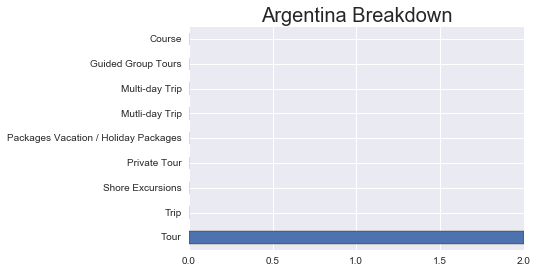

In [7]:
argentina = dframe6.argentina.sort_values(ascending=False)[0:10]
argentina.plot.barh()
plt.title('Argentina Breakdown',fontsize=20)

In [8]:
armenia = dframe6.armenia.sort_values(ascending=False)[0:10]
armenia.plot.barh()
plt.title('Armenia Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'armenia'

In [9]:
aruba = dframe6.aruba.sort_values(ascending=False)[0:10]
aruba.plot.barh()
plt.title('Aruba  Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'aruba'

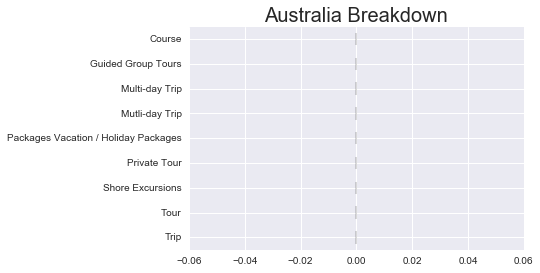

In [10]:
australia = dframe6.australia.sort_values(ascending=False)[0:10]
australia.plot.barh()
plt.title('Australia Breakdown',fontsize=20)

In [11]:
austria = dframe6.austria.sort_values(ascending=False)[0:10]
austria.plot.barh()
plt.title('Austria  Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'austria'

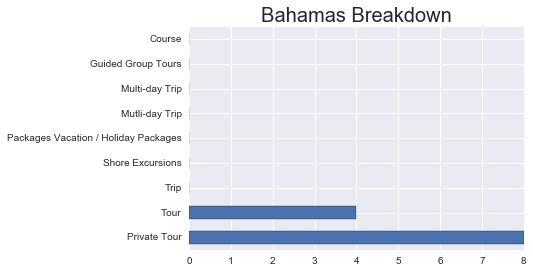

In [12]:
bahamas = dframe6.bahamas.sort_values(ascending=False)[0:10]
bahamas.plot.barh()
plt.title('Bahamas Breakdown',fontsize=20)

In [13]:
bangladesh = dframe6.bangladesh.sort_values(ascending=False)[0:10]
bangladesh.plot.barh()
plt.title('Bangladesh Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'bangladesh'

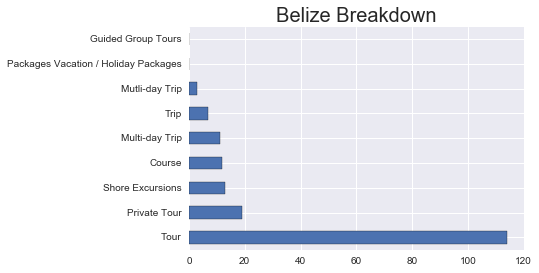

In [14]:
belize = dframe6.belize.sort_values(ascending=False)[0:10]
belize.plot.barh()
plt.title('Belize Breakdown',fontsize=20)

In [15]:
bolivia = dframe6.bolivia.sort_values(ascending=False)[0:10]
bolivia.plot.barh()
plt.title('Bolivia Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'bolivia'

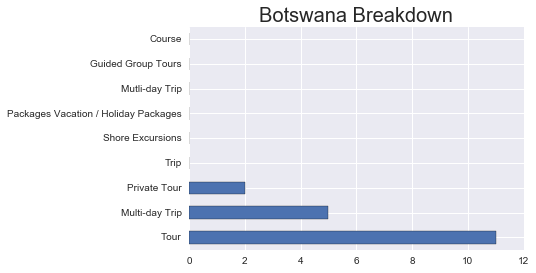

In [16]:
botswana = dframe6.botswana.sort_values(ascending=False)[0:10]
botswana.plot.barh()
plt.title('Botswana Breakdown',fontsize=20)

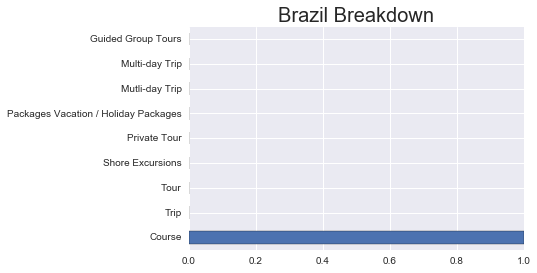

In [17]:
brazil = dframe6.brazil.sort_values(ascending=False)[0:10]
brazil.plot.barh()
plt.title('Brazil Breakdown',fontsize=20)

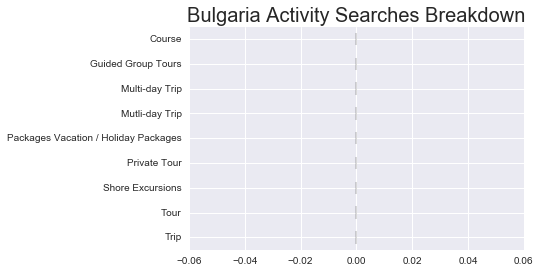

In [18]:
bulgaria = dframe6.bulgaria.sort_values(ascending=False)[0:10]
bulgaria.plot.barh()
plt.title('Bulgaria Activity Searches Breakdown',fontsize=20)

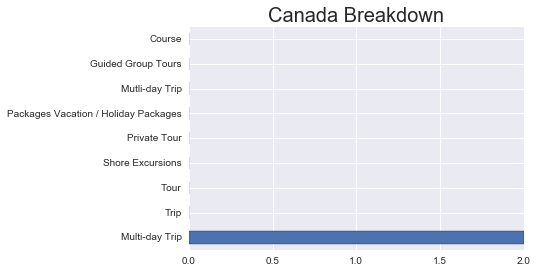

In [19]:
canada = dframe6.canada.sort_values(ascending=False)[0:10]
canada.plot.barh()
plt.title('Canada Breakdown',fontsize=20)

In [20]:
cayman_islands = dframe6.cayman_islands.sort_values(ascending=False)[0:10]
cayman_islands.plot.barh()
plt.title('Cayman Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'cayman_islands'

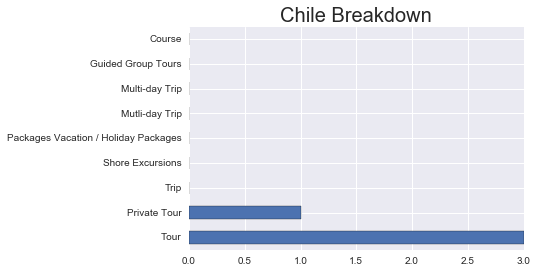

In [21]:
chile = dframe6.chile.sort_values(ascending=False)[0:10]
chile.plot.barh()
plt.title('Chile Breakdown',fontsize=20)

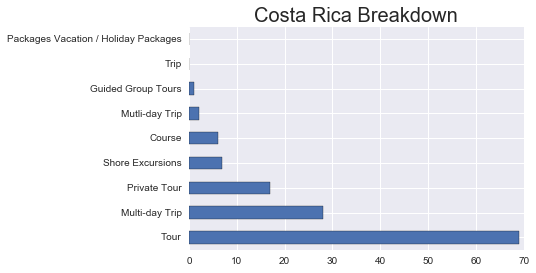

In [22]:
costa_rica = dframe6['costa-rica'].sort_values(ascending=False)[0:10]
costa_rica.plot.barh()
plt.title('Costa Rica Breakdown',fontsize=20)

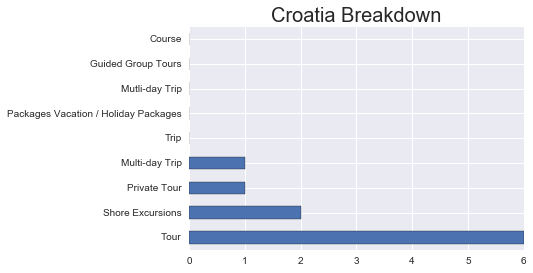

In [23]:
croatia = dframe6.croatia.sort_values(ascending=False)[0:10]
croatia.plot.barh()
plt.title('Croatia Breakdown',fontsize=20)

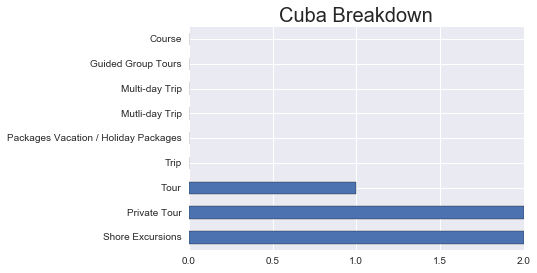

In [24]:
cuba = dframe6.cuba.sort_values(ascending=False)[0:10]
cuba.plot.barh()
plt.title('Cuba Breakdown',fontsize=20)

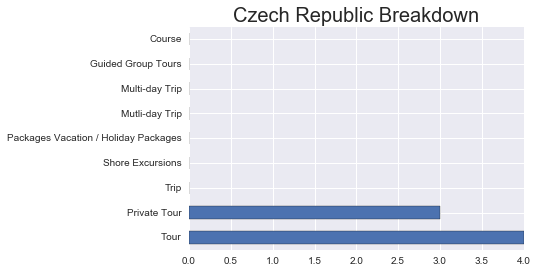

In [25]:
czech_republic = dframe6['czech-republic'].sort_values(ascending=False)[0:10]
czech_republic.plot.barh()
plt.title('Czech Republic Breakdown',fontsize=20)

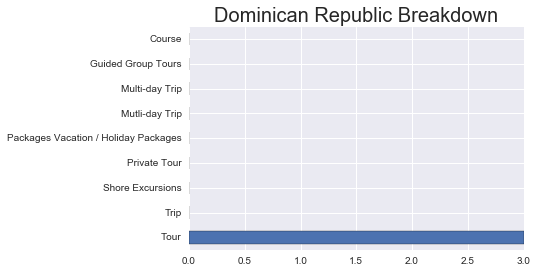

In [26]:
dominican_republic = dframe6['dominican-republic'].sort_values(ascending=False)[0:10]
dominican_republic.plot.barh()
plt.title('Dominican Republic Breakdown',fontsize=20)

In [27]:
east_timor = dframe6["east-timor"].sort_values(ascending=False)[0:10]
east_timor.plot.barh()
plt.title('East Timor Breakdown',fontsize=20)

KeyError: 'east-timor'

In [28]:
ecuador = dframe6.ecuador.sort_values(ascending=False)[0:10]
ecuador.plot.barh()
plt.title('Ecuador Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'ecuador'

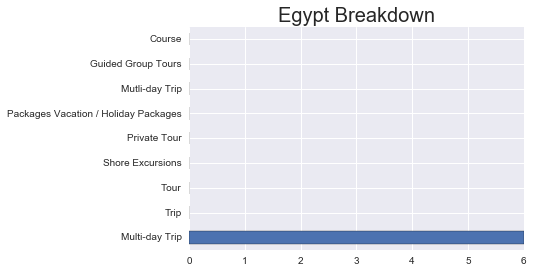

In [29]:
egypt = dframe6.egypt.sort_values(ascending=False)[0:10]
egypt.plot.barh()
plt.title('Egypt Breakdown',fontsize=20)

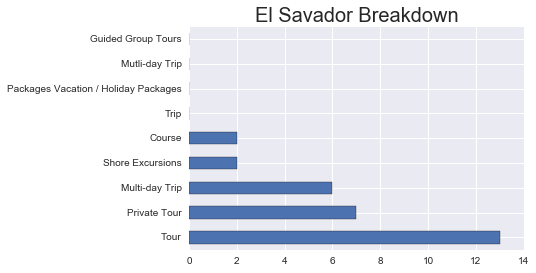

In [30]:
el_salvador = dframe6['el-salvador'].sort_values(ascending=False)[0:10]
el_salvador.plot.barh()
plt.title('El Savador Breakdown',fontsize=20)

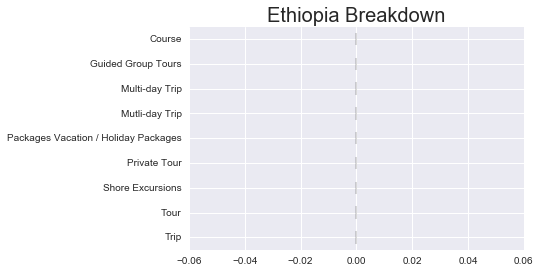

In [31]:
ethiopia = dframe6.ethiopia.sort_values(ascending=False)[0:10]
ethiopia.plot.barh()
plt.title('Ethiopia Breakdown',fontsize=20)

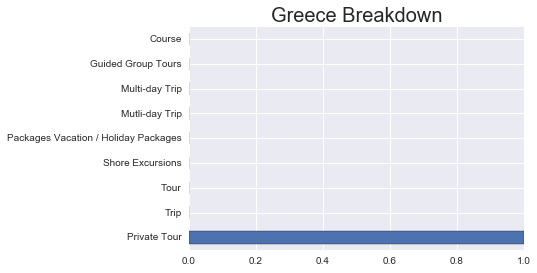

In [32]:
greece = dframe6.greece.sort_values(ascending=False)[0:10]
greece.plot.barh()
plt.title('Greece Breakdown',fontsize=20)

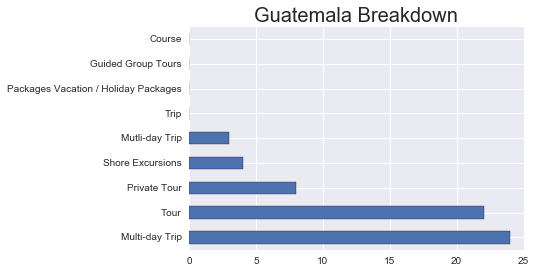

In [33]:
guatemala = dframe6.guatemala.sort_values(ascending=False)[0:10]
guatemala.plot.barh()
plt.title('Guatemala Breakdown',fontsize=20)

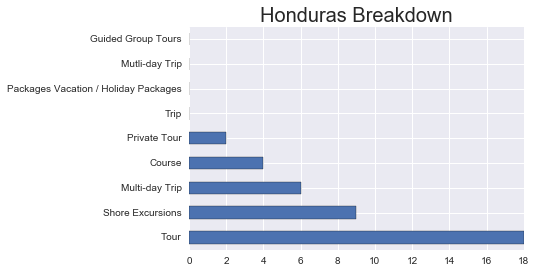

In [34]:
honduras = dframe6.honduras.sort_values(ascending=False)[0:10]
honduras.plot.barh()
plt.title('Honduras Breakdown',fontsize=20)

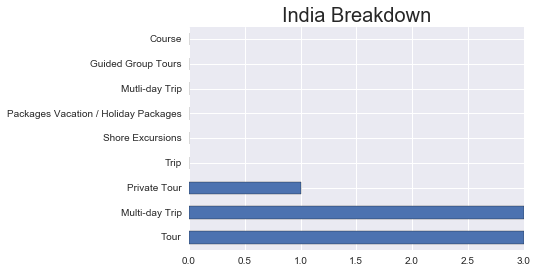

In [35]:
india = dframe6.india.sort_values(ascending=False)[0:10]
india.plot.barh()
plt.title('India Breakdown',fontsize=20)

In [36]:
ireland = dframe6.ireland.sort_values(ascending=False)[0:10]
ireland.plot.barh()
plt.title('Ireland Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'ireland'

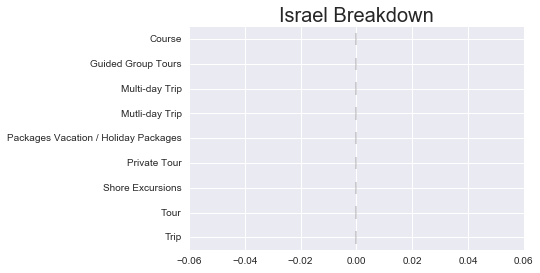

In [37]:
israel = dframe6.israel.sort_values(ascending=False)[0:10]
israel.plot.barh()
plt.title('Israel Breakdown',fontsize=20)

In [38]:
italy = dframe6.italy.sort_values(ascending=False)[0:10]
italy.plot.barh()
plt.title('Italy Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'italy'

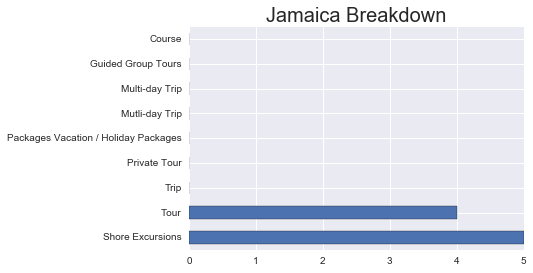

In [39]:
jamaica = dframe6.jamaica.sort_values(ascending=False)[0:10]
jamaica.plot.barh()
plt.title('Jamaica Breakdown',fontsize=20)

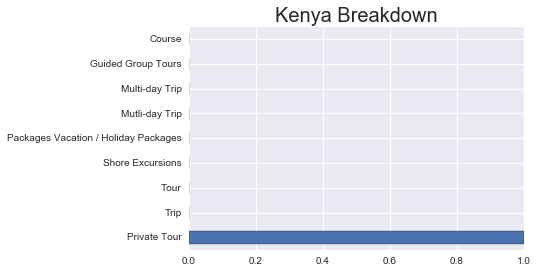

In [40]:
kenya = dframe6.kenya.sort_values(ascending=False)[0:10]
kenya.plot.barh()
plt.title('Kenya Breakdown',fontsize=20)

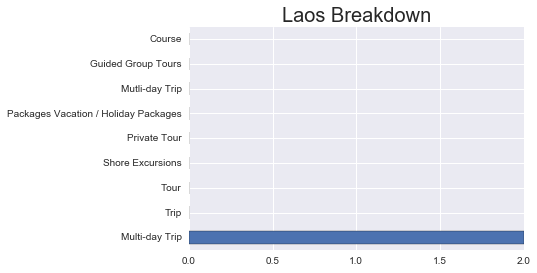

In [41]:
laos = dframe6.laos.sort_values(ascending=False)[0:10]
laos.plot.barh()
plt.title('Laos Breakdown',fontsize=20)

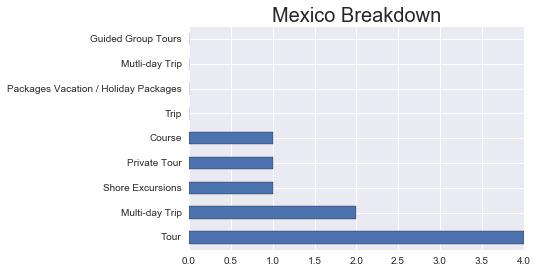

In [42]:
mexico = dframe6.mexico.sort_values(ascending=False)[0:10]
mexico.plot.barh()
plt.title('Mexico Breakdown',fontsize=20)

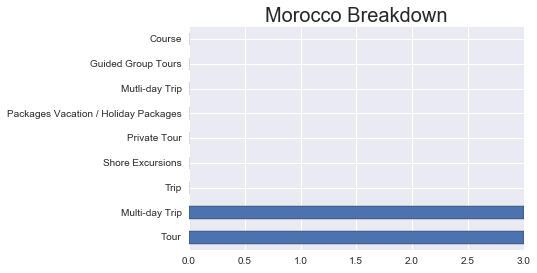

In [43]:
morocco = dframe6.morocco.sort_values(ascending=False)[0:10]
morocco.plot.barh()
plt.title('Morocco Breakdown',fontsize=20)

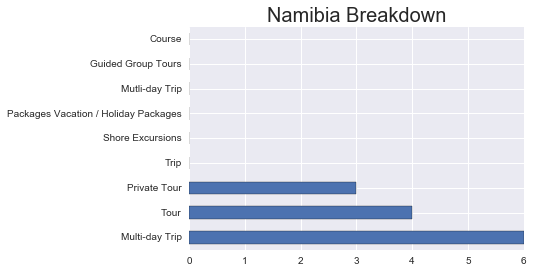

In [44]:
namibia = dframe6.namibia.sort_values(ascending=False)[0:10]
namibia.plot.barh()
plt.title('Namibia Breakdown',fontsize=20)

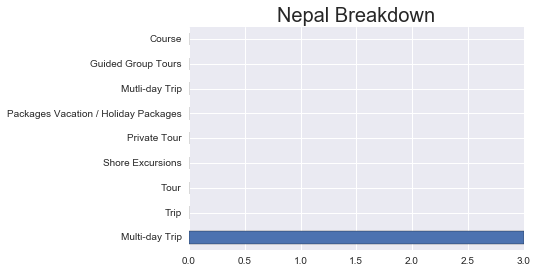

In [45]:
nepal = dframe6.nepal.sort_values(ascending=False)[0:10]
nepal.plot.barh()
plt.title('Nepal Breakdown',fontsize=20)

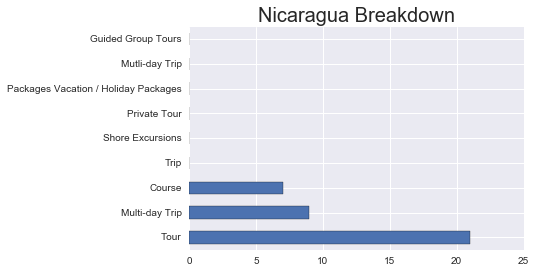

In [46]:
nicaragua = dframe6.nicaragua.sort_values(ascending=False)[0:10]
nicaragua.plot.barh()
plt.title('Nicaragua Breakdown',fontsize=20)

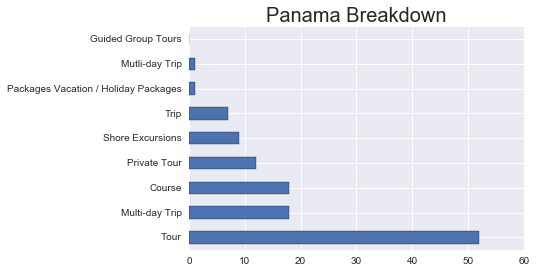

In [47]:
panama = dframe6.panama.sort_values(ascending=False)[0:10]
panama.plot.barh()
plt.title('Panama Breakdown',fontsize=20)

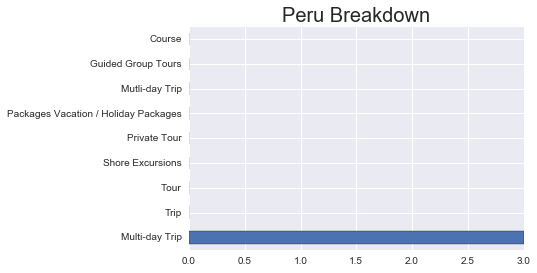

In [48]:
peru = dframe6.peru.sort_values(ascending=False)[0:10]
peru.plot.barh()
plt.title('Peru Breakdown',fontsize=20)

In [49]:
puerto_rico = dframe6['puerto-rico'].sort_values(ascending=False)[0:10]
puerto_rico.plot.barh()
plt.title('Puerto Rico Breakdown',fontsize=20)

KeyError: 'puerto-rico'

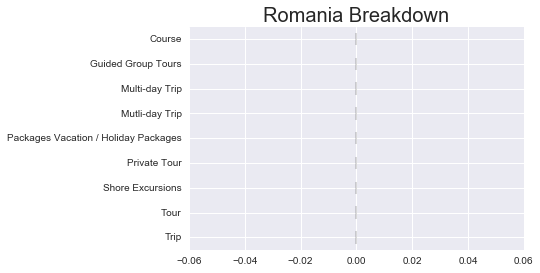

In [50]:
romania = dframe6.romania.sort_values(ascending=False)[0:10]
romania.plot.barh()
plt.title('Romania Breakdown',fontsize=20)

In [51]:
rwanda = dframe6.rwanda.sort_values(ascending=False)[0:10]
rwanda.plot.barh()
plt.title('Rwanda Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'rwanda'

In [52]:
saint_lucia = dframe6['saint-lucia'].sort_values(ascending=False)[0:10]
saint_lucia.plot.barh()
plt.title('Saint Lucia Breakdown',fontsize=20)

KeyError: 'saint-lucia'

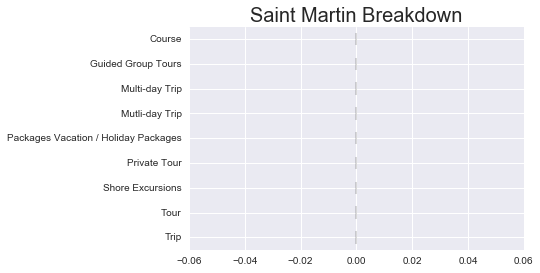

In [53]:
saint_martin = dframe6['saint-martin'].sort_values(ascending=False)[0:10]
saint_martin.plot.barh()
plt.title('Saint Martin Breakdown',fontsize=20)

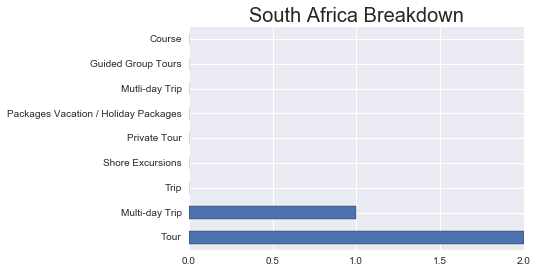

In [54]:
south_africa = dframe6['south-africa'].sort_values(ascending=False)[0:10]
south_africa.plot.barh()
plt.title('South Africa Breakdown',fontsize=20)

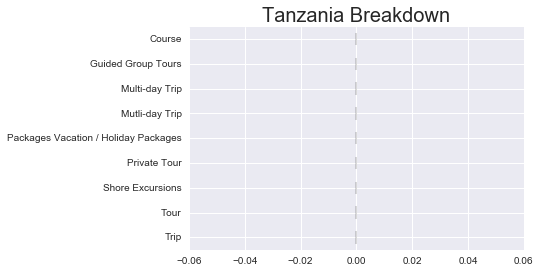

In [55]:
tanzania = dframe6.tanzania.sort_values(ascending=False)[0:10]
tanzania.plot.barh()
plt.title('Tanzania Breakdown',fontsize=20)

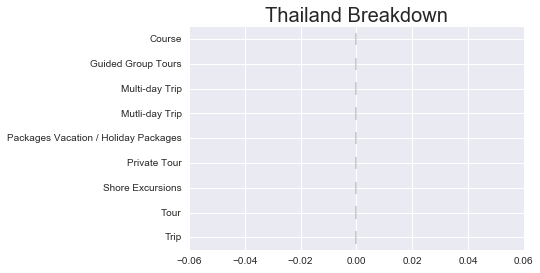

In [56]:
thailand = dframe6.thailand.sort_values(ascending=False)[0:10]
thailand.plot.barh()
plt.title('Thailand Breakdown',fontsize=20)

In [57]:
trinidad_tobago = dframe6['trinidad-&-tobago'].sort_values(ascending=False)[0:10]
trinidad_tobago.plot.barh()
plt.title('Trinidad & Tobago Breakdown',fontsize=20)

KeyError: 'trinidad-&-tobago'

In [58]:
turkey = dframe6.turkey.sort_values(ascending=False)[0:10]
turkey.plot.barh()
plt.title('Turkey Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'turkey'

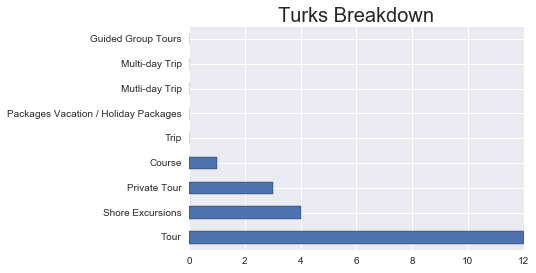

In [59]:
turks = dframe6["turks-and-caicos"].sort_values(ascending=False)[0:10]
turks.plot.barh()
plt.title('Turks Breakdown',fontsize=20)

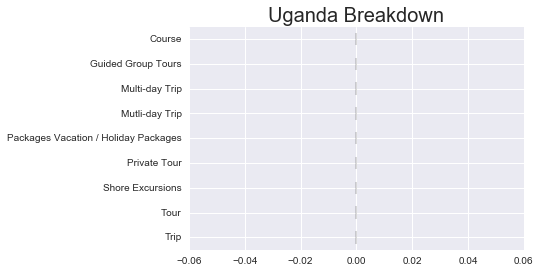

In [60]:
uganda = dframe6.uganda.sort_values(ascending=False)[0:10]
uganda.plot.barh()
plt.title('Uganda Breakdown',fontsize=20)

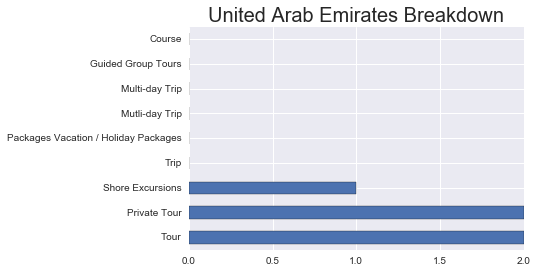

In [61]:
united_arab_emirates = dframe6['united-arab-emirates'].sort_values(ascending=False)[0:10]
united_arab_emirates.plot.barh()
plt.title('United Arab Emirates Breakdown',fontsize=20)

In [62]:
united_kingdom = dframe6['united-kingdom'].sort_values(ascending=False)[0:10]
united_kingdom.plot.barh()
plt.title('United Kingdom Breakdown',fontsize=20)

KeyError: 'united-kingdom'

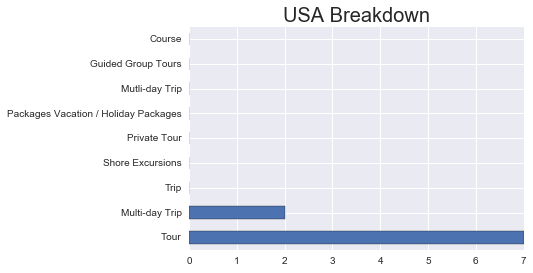

In [63]:
united_states_of_america = dframe6['united-states-of-america'].sort_values(ascending=False)[0:10]
united_states_of_america.plot.barh()
plt.title('USA Breakdown',fontsize=20)

In [64]:
us_virgin_islands = dframe6['us-virgin-islands'].sort_values(ascending=False)[0:10]
us_virgin_islands.plot.barh()
plt.title('US Virgn Islands Breakdown',fontsize=20)

KeyError: 'us-virgin-islands'

In [65]:
uzbekistan = dframe6.uzbekistan.sort_values(ascending=False)[0:10]
uzbekistan.plot.barh()
plt.title('Uzbekistan Breakdown',fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'uzbekistan'

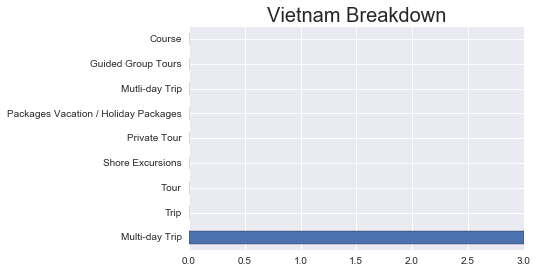

In [66]:
vietnam = dframe6.vietnam.sort_values(ascending=False)[0:10]
vietnam.plot.barh()
plt.title('Vietnam Breakdown',fontsize=20)